##### The arima model is differentiated into 3 parameters p d and q
* AR(P): Auto regression models utilises the dependent relationship between a current observation and observations over a period of time 
* I (d): Integrated is differncing the observations( Subtracting an observation from an oservation at the previous timestep) in order to make the    time series stationary
* MA(q): Moving average uses the dependency between an observation and a residual erroe from a moving average model applied to the lagged observations

#### The general process of the ARIMA model are the following
* Visualise the time series data
* make the time series data staationary
* Plot the Correlation and AutoCorrelation Charts
* Construct the ARIMA model
* Use the model to make predictions

*If d=0:  yt  =  Yt

*If d=1:  yt  =  Yt - Yt-1

*If d=2:  yt  =  (Yt - Yt-1) - (Yt-1 - Yt-2)  =  Yt - 2Yt-1 + Yt-2

In [1]:
import pandas as pd
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import numpy as np
import math
from statsmodels.tsa.stattools import acf,pacf
import statsmodels.tsa.stattools as ts
import statsmodels.api as smp
from statsmodels.tsa.arima_model import ARIMA
import pandas as pd


/anaconda2/envs/py36/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [10]:
df=pd.read_excel('beximco2000.xlsx')
df['date']=pd.to_datetime(df['TRADEDATE'])
df.set_index('date', inplace=True)
df.head()





,TRADEDATE,COMID,LOWPRC,HIPRC,AVGPRC,CLSPRC,TRDNO,TRDVOL,TURNOVER,COMPANYNAME
date,,,,,,,,,,
2000-07-15,15-07-2000,453,78.5,82.0,79.63,78.7,2537,769775,61278365.0,BEXIMCO PHARMACEUTICALS LIMITED
2000-07-16,16-07-2000,453,69.6,79.0,73.25,71.4,4590,1627125,118776810.0,BEXIMCO PHARMACEUTICALS LIMITED
2000-07-17,17-07-2000,453,70.0,75.7,74.01,74.3,4489,1422375,105223510.0,BEXIMCO PHARMACEUTICALS LIMITED
2000-07-18,18-07-2000,453,72.0,77.8,74.32,73.2,3985,1361275,101138340.0,BEXIMCO PHARMACEUTICALS LIMITED
2000-07-19,19-07-2000,453,68.7,72.6,70.52,69.9,4899,1671075,117673305.0,BEXIMCO PHARMACEUTICALS LIMITED


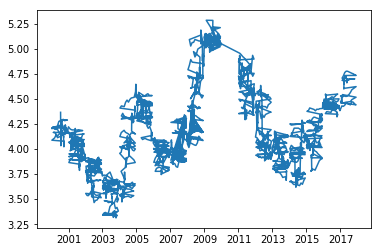

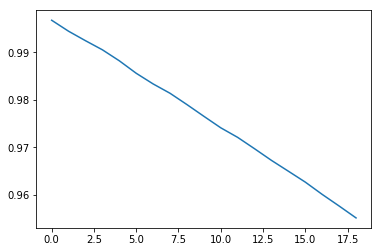

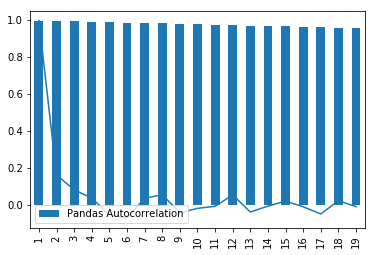

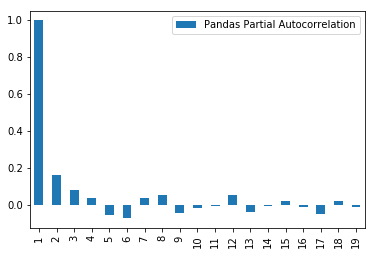

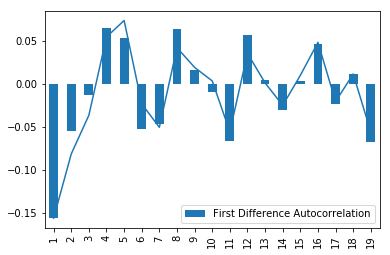

In [15]:

df['CLSPRC'].describe().transpose()
price=df['CLSPRC']
lnprice=np.log(price)
lnprice
plt.plot(lnprice)
plt.show()
acf_1 =  acf(lnprice)[1:20]
plt.plot(acf_1)
plt.show()
test_df = pd.DataFrame([acf_1]).T
test_df.columns = ['Pandas Autocorrelation']
test_df.index += 1
test_df.plot(kind='bar')
pacf_1 =  pacf(lnprice)[1:20]
plt.plot(pacf_1)
plt.show()
test_df = pd.DataFrame([pacf_1]).T
test_df.columns = ['Pandas Partial Autocorrelation']
test_df.index += 1
test_df.plot(kind='bar')
result = ts.adfuller(lnprice, 1)
result

lnprice_diff=lnprice-lnprice.shift()
diff=lnprice_diff.dropna()
acf_1_diff =  acf(diff)[1:20]
test_df = pd.DataFrame([acf_1_diff]).T
test_df.columns = ['First Difference Autocorrelation']
test_df.index += 1
test_df.plot(kind='bar')
pacf_1_diff =  pacf(diff)[1:20]
plt.plot(pacf_1_diff)
plt.show()



In [17]:
price_matrix=lnprice.as_matrix()
model = ARIMA(price_matrix, order=(0,1,0))
model_fit = model.fit(disp=0)
# print(model_fit.summary())





predictions=model_fit.predict(1250,1270 ,typ='levels')
predictions
predictionsadjusted=np.exp(predictions)
predictionsadjusted

array([ 88.50708242,  88.70709842,  86.20689836,  89.70717845,
        88.0070424 ,  86.90695437,  83.30666628,  86.60693037,
        86.40691436,  89.20713844,  96.10769063,  96.10769063,
        94.40755458,  93.10745054,  93.40747455,  93.90751457,
        93.60749056,  91.5073225 ,  90.70725848,  92.50740253,  93.70749856])

In [19]:
df['CLSPRC'].tail(10)

date
2017-05-18    105.6
2017-05-21    105.9
2017-05-22    107.0
2017-05-23    107.1
2017-05-24    109.7
2017-05-25    110.0
2017-05-28    109.2
2017-05-29    108.2
2017-05-30    107.8
2017-05-31    108.2
Name: CLSPRC, dtype: float64

In [9]:
df=pd.read_csv('all_stocks_5yr.csv')
df.head()
df['date']=pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
df.head()



,open,high,low,close,volume,Name
date,,,,,,
2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


## START OF AAL

In [11]:
AAL=df.loc[df['Name'] == 'AAL']
COO=df.loc[df['Name'] == 'COO']
JNPR=df.loc[df['Name'] == 'JNPR']

In [12]:
AAL['close'].describe().transpose()


count    1259.000000
mean       38.393252
std        10.957636
min        13.020000
25%        34.330000
50%        40.870000
75%        46.535000
max        58.470000
Name: close, dtype: float64

In [14]:
price=AAL['close']
prive

In [41]:
price

pandas.core.series.Series

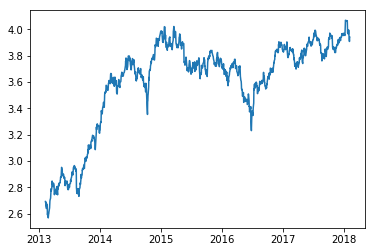

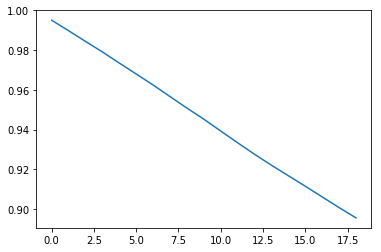

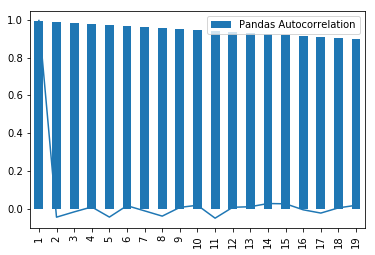

(-2.4173680374291284,
 0.13689429075490656,
 1,
 1257,
 {'1%': -3.4355629707955395,
  '10%': -2.567995644141416,
  '5%': -2.8638420633876671},
 -5977.2604250410168)

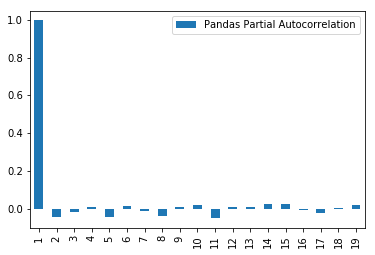

In [20]:
lnprice=np.log(price)
lnprice
plt.plot(lnprice)
plt.show()
acf_1 =  acf(lnprice)[1:20]
plt.plot(acf_1)
plt.show()
test_df = pd.DataFrame([acf_1]).T
test_df.columns = ['Pandas Autocorrelation']
test_df.index += 1
test_df.plot(kind='bar')
pacf_1 =  pacf(lnprice)[1:20]
plt.plot(pacf_1)
plt.show()
test_df = pd.DataFrame([pacf_1]).T
test_df.columns = ['Pandas Partial Autocorrelation']
test_df.index += 1
test_df.plot(kind='bar')
result = ts.adfuller(lnprice, 1)
result

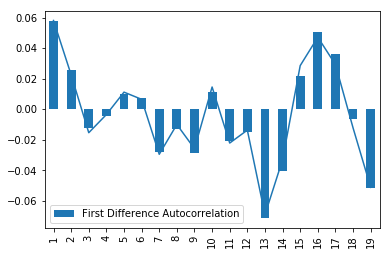

In [22]:
lnprice_diff=lnprice-lnprice.shift()
diff=lnprice_diff.dropna()
acf_1_diff =  acf(diff)[1:20]
test_df = pd.DataFrame([acf_1_diff]).T
test_df.columns = ['First Difference Autocorrelation']
test_df.index += 1
test_df.plot(kind='bar')
pacf_1_diff =  pacf(diff)[1:20]
plt.plot(pacf_1_diff)
plt.show()

In [28]:
price_matrix=lnprice.as_matrix()
model = ARIMA(price_matrix, order=(0,1,0))
model_fit = model.fit(disp=0)
# print(model_fit.summary())

In [44]:
predictions=model_fit.predict(1250,1270 ,typ='levels')
predictions
predictionsadjusted=np.exp(predictions)
predictionsadjusted

array([ 53.93349514,  52.15172785,  49.80940457,  51.23081442,
        51.45103285,  51.50211637,  51.55325061,  51.60443562,
        51.65567144,  51.70695814,  51.75829576,  51.80968435,
        51.86112396,  51.91261464,  51.96415644,  52.01574942])

In [47]:
AAL['close'].tail(10)

date
2018-01-25    53.05
2018-01-26    53.07
2018-01-29    52.68
2018-01-30    52.59
2018-01-31    54.32
2018-02-01    53.88
2018-02-02    52.10
2018-02-05    49.76
2018-02-06    51.18
2018-02-07    51.40
Name: close, dtype: float64